## 1. Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

![](https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg)


In [28]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

## 2. Import Libraries

In [29]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Load Dataset

Loading .csv dataset from url provided by kaggle, using Pandas

In [30]:
# Load dataset
import io
from js import fetch
res = await fetch('https://jupyterlite.anaconda.cloud/b0df9a1c-3954-4c78-96e6-07ab473bea1a/files/iris/iris.csv')
csv_data = await res.text()
dataset = pd.read_csv(io.StringIO(csv_data))

## 3. Sumarize the Dataset

In [31]:
# Print the shape of the data
# It has 150 instances and 5 attributes
print(dataset.shape)

(150, 6)


In [32]:
# Print the first 10 rows of the data
print(dataset.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species

0   1            5.1           3.5            1.4           0.2  Iris-setosa

1   2            4.9           3.0            1.4           0.2  Iris-setosa

2   3            4.7           3.2            1.3           0.2  Iris-setosa

3   4            4.6           3.1            1.5           0.2  Iris-setosa

4   5            5.0           3.6            1.4           0.2  Iris-setosa

5   6            5.4           3.9            1.7           0.4  Iris-setosa

6   7            4.6           3.4            1.4           0.3  Iris-setosa

7   8            5.0           3.4            1.5           0.2  Iris-setosa

8   9            4.4           2.9            1.4           0.2  Iris-setosa

9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [33]:
# Print the last 10 rows of the data
print(dataset.tail(10))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \

140  141            6.7           3.1            5.6           2.4   

141  142            6.9           3.1            5.1           2.3   

142  143            5.8           2.7            5.1           1.9   

143  144            6.8           3.2            5.9           2.3   

144  145            6.7           3.3            5.7           2.5   

145  146            6.7           3.0            5.2           2.3   

146  147            6.3           2.5            5.0           1.9   

147  148            6.5           3.0            5.2           2.0   

148  149            6.2           3.4            5.4           2.3   

149  150            5.9           3.0            5.1           1.8   



            Species  

140  Iris-virginica  

141  Iris-virginica  

142  Iris-virginica  

143  Iris-virginica  

144  Iris-virginica  

145  Iris-virginica  

146  Iris-virginica  

147  Iris-virginica  

148  Iris-

In [34]:
# Describe some basic statistics about the data
dataset.iloc[:,1:].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 4. Data cleansing

In [35]:
# First, create a dataset backup
dataset_bak = dataset

In [36]:
# Remove first column - Id
dataset = dataset.drop('Id',axis=1)
print(dataset.head(10))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species

0            5.1           3.5            1.4           0.2  Iris-setosa

1            4.9           3.0            1.4           0.2  Iris-setosa

2            4.7           3.2            1.3           0.2  Iris-setosa

3            4.6           3.1            1.5           0.2  Iris-setosa

4            5.0           3.6            1.4           0.2  Iris-setosa

5            5.4           3.9            1.7           0.4  Iris-setosa

6            4.6           3.4            1.4           0.3  Iris-setosa

7            5.0           3.4            1.5           0.2  Iris-setosa

8            4.4           2.9            1.4           0.2  Iris-setosa

9            4.9           3.1            1.5           0.1  Iris-setosa


In [37]:
# Change column names
dataset.columns = ['Sepal-length', 'Sepal-width', 'Petal-length', 'Petal-width', 'Species']
print(dataset.head(20))

    Sepal-length  Sepal-width  Petal-length  Petal-width      Species

0            5.1          3.5           1.4          0.2  Iris-setosa

1            4.9          3.0           1.4          0.2  Iris-setosa

2            4.7          3.2           1.3          0.2  Iris-setosa

3            4.6          3.1           1.5          0.2  Iris-setosa

4            5.0          3.6           1.4          0.2  Iris-setosa

5            5.4          3.9           1.7          0.4  Iris-setosa

6            4.6          3.4           1.4          0.3  Iris-setosa

7            5.0          3.4           1.5          0.2  Iris-setosa

8            4.4          2.9           1.4          0.2  Iris-setosa

9            4.9          3.1           1.5          0.1  Iris-setosa

10           5.4          3.7           1.5          0.2  Iris-setosa

11           4.8          3.4           1.6          0.2  Iris-setosa

12           4.8          3.0           1.4          0.1  Iris-setosa

13    

In [38]:
# Class distribution, to see the number of rows that belong to each species
print(dataset.groupby('Species').size())

Species

Iris-setosa        50

Iris-versicolor    50

Iris-virginica     50

dtype: int64


## 5. Data Visualization

### 5.1. Univariate Plots

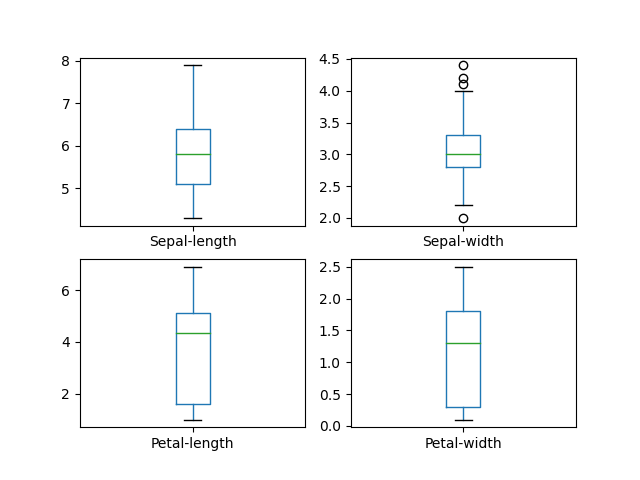

In [39]:
# Box and whisker plots. Univariate plots, one for each individual variable
fig=plt.figure(figsize=(10,5), dpi=100, facecolor='w', edgecolor='k')
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

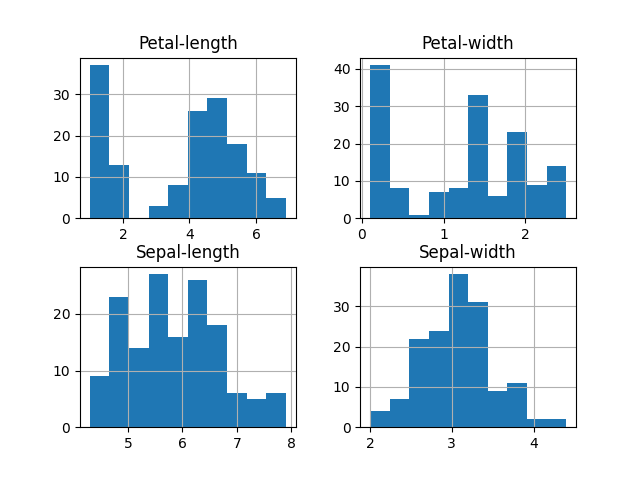

In [40]:
# Histograms. Create a histogram of each input variable to get an idea of the distribution
dataset.hist()
plt.show()

### 5.2. Multivariate Plots

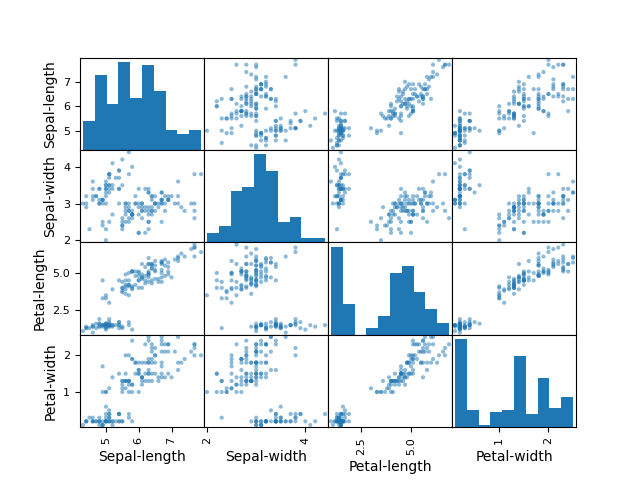

In [41]:
# Scatter plot matrix. See all pairs of attributtes, to detect correlations or relationships
scatter_matrix(dataset)
plt.show()

## 6. Evaluate Some Algorithms

- We need to know that the model we created is good.
- Use statistical methods to estimate the accuray of the models on unseen data: split the dataset in two, 80% to train, evaluate and select among our models and 20% hold back as a validation dataset

### 6.1. Create a validation dataset

In [42]:
# Split-out validation dataset
array = dataset.values
# All rows and colums except species column
X = array[:,0:4]
# Species column
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

### 6.2. Build models and evaluate them

We will use stratified 10-fold cross validation to estimate model accuracy: split the dataset in 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits

Test 6 different algorithms:

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN)
4. Classification and Regression Trees (CART)
5. Gaussian Naive Bayes (NB)
6. Support Vector Machines (SVM)

In [43]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)

LDA: 0.975000 (0.038188)

KNN: 0.958333 (0.041667)

CART: 0.933333 (0.050000)

NB: 0.950000 (0.055277)

SVM: 0.983333 (0.033333)


- Support Vector Machines (SVM) has the largest estimated accuracy score: ~ 98%
- Linear Discriminant Analysis (LDA) has the second one: ~ 97%

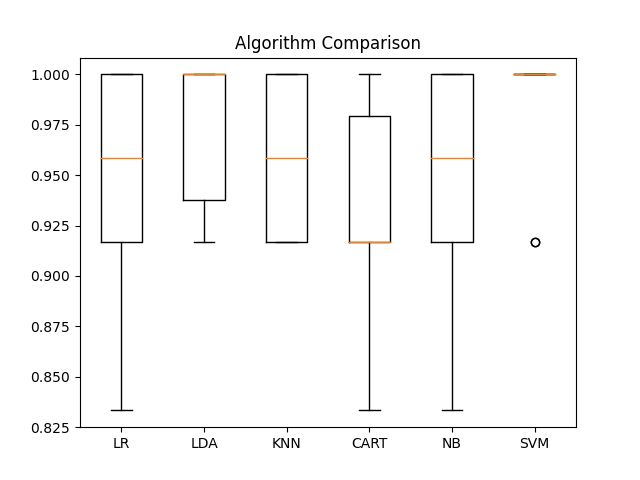

In [44]:
# Compare algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

## 7. Making predictions and evaluate them

In [45]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [46]:
# Evaluate predictions by comparing them to the expected results in the validation set
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667

[[11  0  0]

 [ 0 12  1]

 [ 0  0  6]]

                 precision    recall  f1-score   support



    Iris-setosa       1.00      1.00      1.00        11

Iris-versicolor       1.00      0.92      0.96        13

 Iris-virginica       0.86      1.00      0.92         6



       accuracy                           0.97        30

      macro avg       0.95      0.97      0.96        30

   weighted avg       0.97      0.97      0.97        30


